In [9]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [11]:
file_path = r"C:\Users\liuxiaotao\Desktop\NTU STUDYING\SC1015\archive2/CVD_cleaned.csv"

df = pd.read_csv(file_path)


print(df.head())

  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

In [13]:
# LabelEncoder
label_encoder = LabelEncoder()


df['General_Health'] = label_encoder.fit_transform(df['General_Health'])
df['Checkup'] = label_encoder.fit_transform(df['Checkup'])
df['Exercise'] = label_encoder.fit_transform(df['Exercise'])
df['Skin_Cancer'] = label_encoder.fit_transform(df['Skin_Cancer'])
df['Other_Cancer'] = label_encoder.fit_transform(df['Other_Cancer'])
df['Depression'] = label_encoder.fit_transform(df['Depression'])
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])
df['Arthritis'] = label_encoder.fit_transform(df['Arthritis'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Age_Category'] = label_encoder.fit_transform(df['Age_Category'])
df['Heart_Disease'] = label_encoder.fit_transform(df['Heart_Disease'])
df['Smoking_History'] = label_encoder.fit_transform(df['Smoking_History'])

df.head()
print (df.dtypes)
print (df.isnull().sum())

General_Health                    int32
Checkup                           int32
Exercise                          int32
Heart_Disease                     int32
Skin_Cancer                       int32
Other_Cancer                      int32
Depression                        int32
Diabetes                          int32
Arthritis                         int32
Sex                               int32
Age_Category                      int32
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int32
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression            

In [15]:
# Splitting features and target variable
X = df.drop('Heart_Disease', axis=1)  # Features
y = df['Heart_Disease']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Training the decision tree model on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Predicting on the test set
y_pred = clf.predict(X_test)

# Calculating the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Printing the classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     70930
           1       0.19      0.22      0.21      6284

    accuracy                           0.86     77214
   macro avg       0.56      0.57      0.57     77214
weighted avg       0.87      0.86      0.87     77214



In [ ]:


# Create a figure with specified size
f = plt.figure(figsize=(12, 12))

# Plot the decision tree
plot_tree(clf, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=['Not Heart Disease', 'Heart Disease'])

# Show the plot
plt.show()

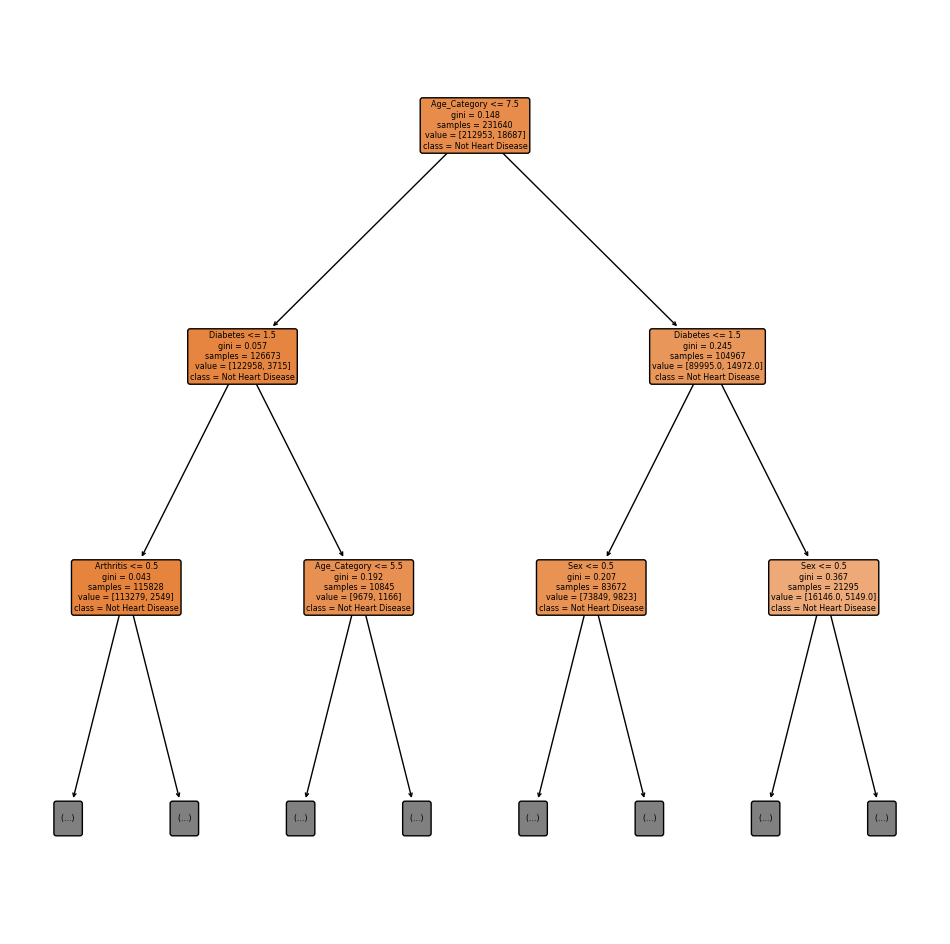

In [31]:
# Create a figure with specified size
f = plt.figure(figsize=(12, 12))

# Plot the decision tree with max_depth set to 5
plot_tree(clf, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=['Not Heart Disease', 'Heart Disease'],
          max_depth=2)  # Set max_depth to 5

# Show the plot
plt.show()